In [5]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, classification_report

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the csv files
file_key_train = 'Hwk_Assignments/train.csv'
file_key_test = 'Hwk_Assignments/test.csv'

bucket_object_train = bucket.Object(file_key_train)
file_object_train = bucket_object_train.get()
file_content_stream_train = file_object_train.get('Body')

bucket_object_test = bucket.Object(file_key_test)
file_object_test = bucket_object_test.get()
file_content_stream_test = file_object_test.get('Body')

## Reading the train & test file
train = pd.read_csv(file_content_stream_train, sep = '|')
test = pd.read_csv(file_content_stream_test, sep = '|')

## Reporting the number of observations in each of the data-frames
print('The number of observations in the train data-frame is ', train.shape[0])
print('The number of observations in the test data-frame is ', test.shape[0])

## Frequency table of fraud 
print('The frequency table of fraud is \n', train['fraud'].value_counts() /  train.shape[0])

The number of observations in the train data-frame is  1879
The number of observations in the test data-frame is  498121
The frequency table of fraud is 
 0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [6]:
## Printing head of train
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


## Visualizations

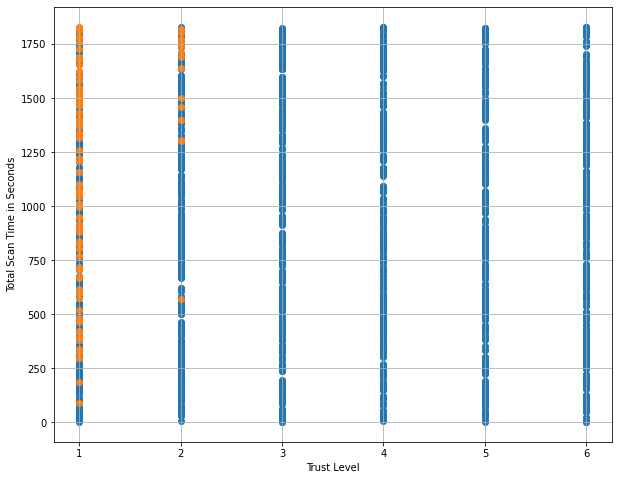

In [16]:
## Defining the figure size
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlabel('Trust Level')
plt.ylabel('Total Scan Time in Seconds')

colors = ['blue', 'red']

for i in train['fraud'].unique():
    
    temp = train[train['fraud'] == i]
    plt.scatter(temp['trustLevel'], temp['totalScanTimeInSeconds'])

In [15]:
## From the above chart, we clearly see that fraud cases happens when the 
## trust level is either 1 or 2.

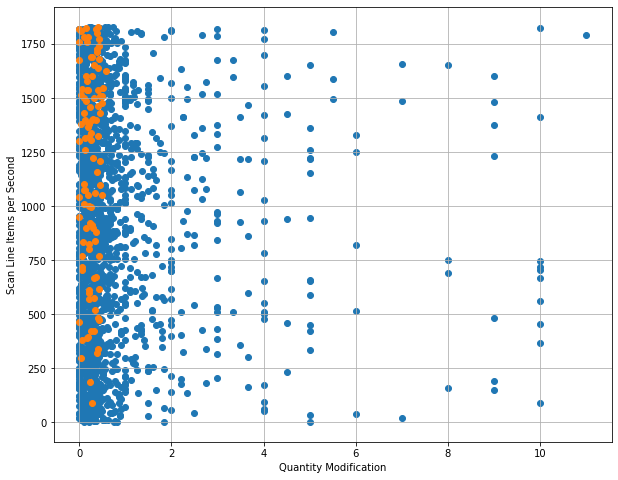

In [24]:
## Defining the figure size
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlabel('Quantity Modification')
plt.ylabel('Scan Line Items per Second')

colors = ['blue', 'red']

for i in train['fraud'].unique():
    
    temp = train[train['fraud'] == i]
    plt.scatter(temp['lineItemVoidsPerPosition'], temp['totalScanTimeInSeconds'])

## Initial Modeling

In [ ]:
## Defining input and target variables
X = train[['trustLevel', ]]
Y = train['fraud']

## Splitting the data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)